# Product Performance & Warehouse Optimization

**Objective:** Analyze sales and warehouse data to identify:
- Top & bottom performing products
- Space & storage inefficiencies
- Profitability drivers
- Optimization opportunities

**Tools Used:** Python, Pandas, Seaborn, Matplotlib


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV files
products = pd.read_csv("product_master_named.csv")
sales = pd.read_csv("sales_data.csv")
warehouse = pd.read_csv("warehouse_data_named.csv")


In [3]:
# Preview data
print(products.head())
print(sales.head())
print(warehouse.head())


  Product_ID       Product_Name        Category  Cost_Price  Selling_Price
0       P001      Smartphone X1          Sports         141            225
1       P002      Laptop Pro 15           Books         416            524
2       P003  Bluetooth Speaker  Home & Kitchen         493            583
3       P004      LED TV 42inch           Books         477            505
4       P005   Wireless Earbuds           Books         313            420
  Product_ID Product_Name        Category  Units_Sold  Revenue  Selling_Price  \
0       P001    Product_1          Sports           4      900            225   
1       P002    Product_2           Books           1      524            524   
2       P003    Product_3  Home & Kitchen           6     3498            583   
3       P004    Product_4           Books           5     2525            505   
4       P005    Product_5           Books           4     1680            420   

   Cost_Price  Order_Date Customer_Region  
0         141  2024

In [5]:
# Merge datasets
# Step 1: Merge product master with sales on Product_ID
new_df = pd.merge(sales, products, on="Product_ID", how="left")


# Final dataset ready
print(new_df.shape)
print(new_df.head())


(17402, 13)
  Product_ID Product_Name_x      Category_x  Units_Sold  Revenue  \
0       P001      Product_1          Sports           4      900   
1       P002      Product_2           Books           1      524   
2       P003      Product_3  Home & Kitchen           6     3498   
3       P004      Product_4           Books           5     2525   
4       P005      Product_5           Books           4     1680   

   Selling_Price_x  Cost_Price_x  Order_Date Customer_Region  \
0              225           141  2024-01-01           North   
1              524           416  2024-01-01           North   
2              583           493  2024-01-01            East   
3              505           477  2024-01-01           South   
4              420           313  2024-01-01           South   

      Product_Name_y      Category_y  Cost_Price_y  Selling_Price_y  
0      Smartphone X1          Sports           141              225  
1      Laptop Pro 15           Books           416    

In [6]:
# Save merged dataframe into a new CSV
new_df.to_csv("product.csv", index=False)


In [7]:
#New csv files
sales = pd.read_csv("product.csv")
warehouse = pd.read_csv("warehouse_data_named.csv")



SALES DATA

In [8]:
# Structure of dataset
sales.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17402 entries, 0 to 17401
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product_ID       17402 non-null  object
 1   Product_Name_x   17402 non-null  object
 2   Category_x       17402 non-null  object
 3   Units_Sold       17402 non-null  int64 
 4   Revenue          17402 non-null  int64 
 5   Selling_Price_x  17402 non-null  int64 
 6   Cost_Price_x     17402 non-null  int64 
 7   Order_Date       17402 non-null  object
 8   Customer_Region  17402 non-null  object
 9   Product_Name_y   17402 non-null  object
 10  Category_y       17402 non-null  object
 11  Cost_Price_y     17402 non-null  int64 
 12  Selling_Price_y  17402 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.7+ MB


In [9]:
# Summary statistics
sales.describe()

,Units_Sold,Revenue,Selling_Price_x,Cost_Price_x,Cost_Price_y,Selling_Price_y
count,17402.000000,17402.000000,17402.000000,17402.000000,17402.000000,17402.000000
mean,3.157798,1260.362889,399.106539,292.231123,292.231123,399.106539
std,1.633838,817.762449,139.462320,128.123685,128.123685,139.462320
min,1.000000,103.000000,103.000000,51.000000,51.000000,103.000000
25%,2.000000,583.000000,281.000000,211.000000,211.000000,281.000000
50%,3.000000,1088.000000,421.000000,301.000000,301.000000,421.000000
75%,4.000000,1728.000000,511.000000,409.000000,409.000000,511.000000
max,13.000000,6190.000000,628.000000,495.000000,495.000000,628.000000


In [10]:
# Check missing values
sales.isnull().sum()


Product_ID         0
Product_Name_x     0
Category_x         0
Units_Sold         0
Revenue            0
Selling_Price_x    0
Cost_Price_x       0
Order_Date         0
Customer_Region    0
Product_Name_y     0
Category_y         0
Cost_Price_y       0
Selling_Price_y    0
dtype: int64

In [11]:
# Preview data
sales.head()

,Product_ID,Product_Name_x,Category_x,Units_Sold,Revenue,Selling_Price_x,Cost_Price_x,Order_Date,Customer_Region,Product_Name_y,Category_y,Cost_Price_y,Selling_Price_y
0,P001,Product_1,Sports,4,900,225,141,2024-01-01,North,Smartphone X1,Sports,141,225
1,P002,Product_2,Books,1,524,524,416,2024-01-01,North,Laptop Pro 15,Books,416,524
2,P003,Product_3,Home & Kitchen,6,3498,583,493,2024-01-01,East,Bluetooth Speaker,Home & Kitchen,493,583
3,P004,Product_4,Books,5,2525,505,477,2024-01-01,South,LED TV 42inch,Books,477,505
4,P005,Product_5,Books,4,1680,420,313,2024-01-01,South,Wireless Earbuds,Books,313,420


Now modifing few col names and deleting few col which appears same during the merging of the csv files

In [12]:
# Drop duplicate/extra columns
sales = sales.drop(columns=["Product_Name_x", "Category_y", "Cost_Price_y", "Selling_Price_y"])

In [13]:
sales.head()

,Product_ID,Category_x,Units_Sold,Revenue,Selling_Price_x,Cost_Price_x,Order_Date,Customer_Region,Product_Name_y
0,P001,Sports,4,900,225,141,2024-01-01,North,Smartphone X1
1,P002,Books,1,524,524,416,2024-01-01,North,Laptop Pro 15
2,P003,Home & Kitchen,6,3498,583,493,2024-01-01,East,Bluetooth Speaker
3,P004,Books,5,2525,505,477,2024-01-01,South,LED TV 42inch
4,P005,Books,4,1680,420,313,2024-01-01,South,Wireless Earbuds


In [14]:
# Rename columns 
sales = sales.rename(columns={
    "Product_Name_y": "Product_Name",
    "Category_x": "Category",
    "Cost_Price_x": "Cost_Price",
    "Selling_Price_x": "Selling_Price"
})


In [15]:
sales.head()

,Product_ID,Category,Units_Sold,Revenue,Selling_Price,Cost_Price,Order_Date,Customer_Region,Product_Name
0,P001,Sports,4,900,225,141,2024-01-01,North,Smartphone X1
1,P002,Books,1,524,524,416,2024-01-01,North,Laptop Pro 15
2,P003,Home & Kitchen,6,3498,583,493,2024-01-01,East,Bluetooth Speaker
3,P004,Books,5,2525,505,477,2024-01-01,South,LED TV 42inch
4,P005,Books,4,1680,420,313,2024-01-01,South,Wireless Earbuds


In [16]:
# Define the desir order
new_order = [
    "Product_Name", 
    "Product_ID", 
    "Category", 
    "Cost_Price", 
    "Selling_Price", 
    "Units_Sold", 
    "Revenue"
]

# Reorder dataframe
sales = sales[new_order]


In [17]:
sales.head()

,Product_Name,Product_ID,Category,Cost_Price,Selling_Price,Units_Sold,Revenue
0,Smartphone X1,P001,Sports,141,225,4,900
1,Laptop Pro 15,P002,Books,416,524,1,524
2,Bluetooth Speaker,P003,Home & Kitchen,493,583,6,3498
3,LED TV 42inch,P004,Books,477,505,5,2525
4,Wireless Earbuds,P005,Books,313,420,4,1680


In [18]:
#Adding a new col of profit/loss status

# Calculate profit or loss amount
sales["Profit_Loss_Amount"] = (sales["Selling_Price"] - sales["Cost_Price"]) * sales["Units_Sold"]

# Create Profit/Loss status column
sales["Profit_Loss_Status"] = sales["Profit_Loss_Amount"].apply(lambda x: "Profit" if x > 0 else "Loss")


In [19]:
sales.head()

,Product_Name,Product_ID,Category,Cost_Price,Selling_Price,Units_Sold,Revenue,Profit_Loss_Amount,Profit_Loss_Status
0,Smartphone X1,P001,Sports,141,225,4,900,336,Profit
1,Laptop Pro 15,P002,Books,416,524,1,524,108,Profit
2,Bluetooth Speaker,P003,Home & Kitchen,493,583,6,3498,540,Profit
3,LED TV 42inch,P004,Books,477,505,5,2525,140,Profit
4,Wireless Earbuds,P005,Books,313,420,4,1680,428,Profit


In [28]:
# Save the cleaned sales dataframe into a new CSV
sales.to_csv("cleaned_sales_data.csv", index=False)


Revenue and profit Analysis

In [20]:
# Top 10 products by revenue
sales.groupby("Product_Name")["Revenue"].sum().sort_values(ascending=False).head(10)




Product_Name
Men's Cotton Shirt      723456
Vacuum Cleaner          689566
Non-stick Frying Pan    639462
Smartwatch Series 5     638208
Table Lamp              635614
Bluetooth Speaker       626725
Badminton Racket        615712
Mechanical Keyboard     590784
Mixer Grinder           588913
Backpack Travel         587208
Name: Revenue, dtype: int64

In [21]:
# Bottom 10 products by revenue
sales.groupby("Product_Name")["Revenue"].sum().sort_values().head(10)



Product_Name
Air Purifier              115154
Yoga Mat                  140208
Cookbook Deluxe           152540
Language Learning Book    205492
History Encyclopedia      215865
Tennis Racket             250260
Smartphone X1             251550
Women's Denim Jacket      258120
Induction Cooktop         279930
Ceramic Dinner Set        288798
Name: Revenue, dtype: int64

In [22]:
# Top 10 products by gross profit
sales.groupby("Product_Name")["Profit_Loss_Amount"].sum().sort_values(ascending=False).head(10)



Product_Name
Casual Sneakers          220578
Jump Rope                207702
Mechanical Keyboard      207426
Vacuum Cleaner           202748
Fiction Novel B          198557
Non-stick Frying Pan     196924
Children's Story Book    185470
Refrigerator 300L        180964
Ceramic Dinner Set       176235
Sports Watch             171588
Name: Profit_Loss_Amount, dtype: int64

In [23]:
# Profit margin by category
(sales.groupby("Category")["Profit_Loss_Amount"].sum() / sales.groupby("Category")["Revenue"].sum()) * 100.

Category
Books             21.627522
Clothing          32.342470
Electronics       23.942257
Home & Kitchen    25.680761
Sports            30.569871
dtype: float64

WE CAN CLEARLY SEE THAT THE CLOTHING AND SPORTS PROFIT MARGIN IS FAR HIGH THAN THE OTHER ONES

In [24]:
# Total profit/loss across all sales
sales["Profit_Loss_Amount"].sum()

np.int64(5875355)

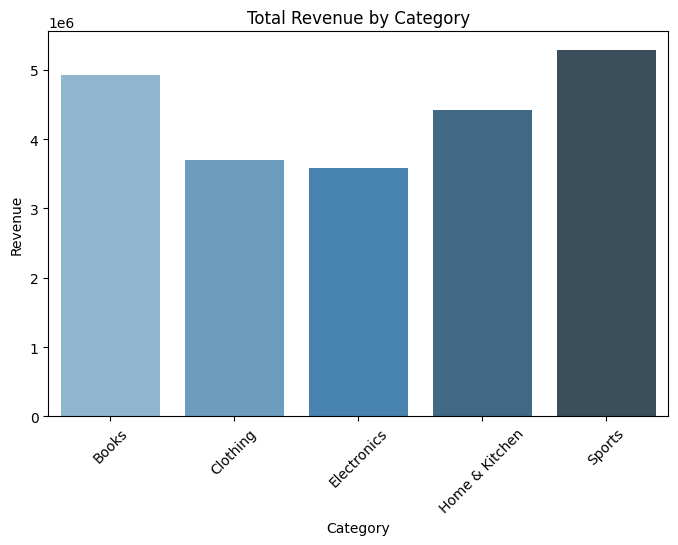

In [25]:
# Revenue by category
category_revenue = sales.groupby("Category")["Revenue"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Revenue", hue="Category", data=category_revenue, palette="Blues_d", legend=False)
plt.title("Total Revenue by Category")
plt.xticks(rotation=45)
plt.show()


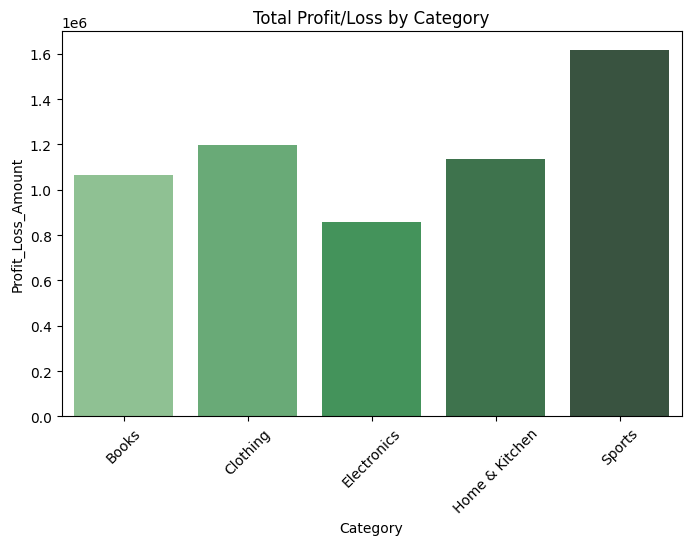

In [26]:
# Profit by category
category_profit = sales.groupby("Category")["Profit_Loss_Amount"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Profit_Loss_Amount",hue='Category', data=category_profit, palette="Greens_d")
plt.title("Total Profit/Loss by Category")
plt.xticks(rotation=45)
plt.show()

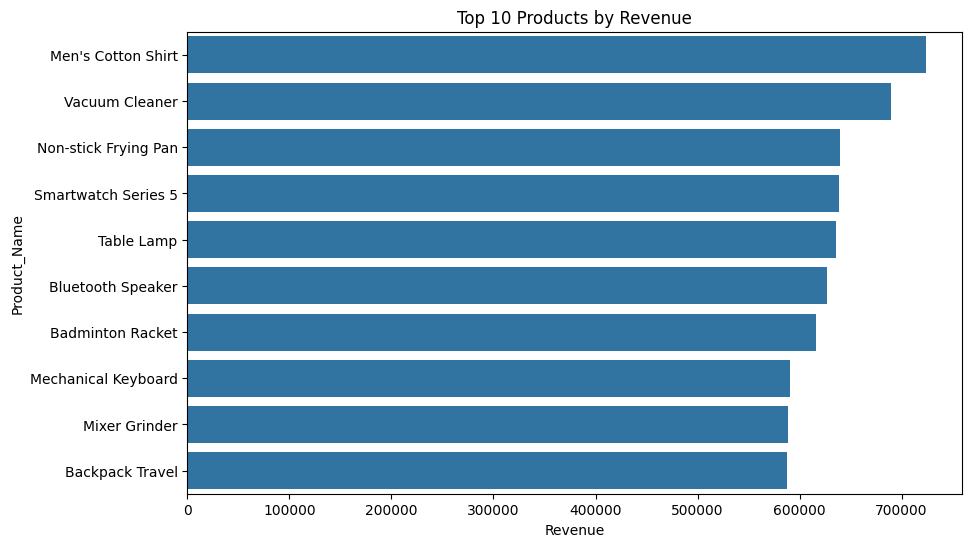

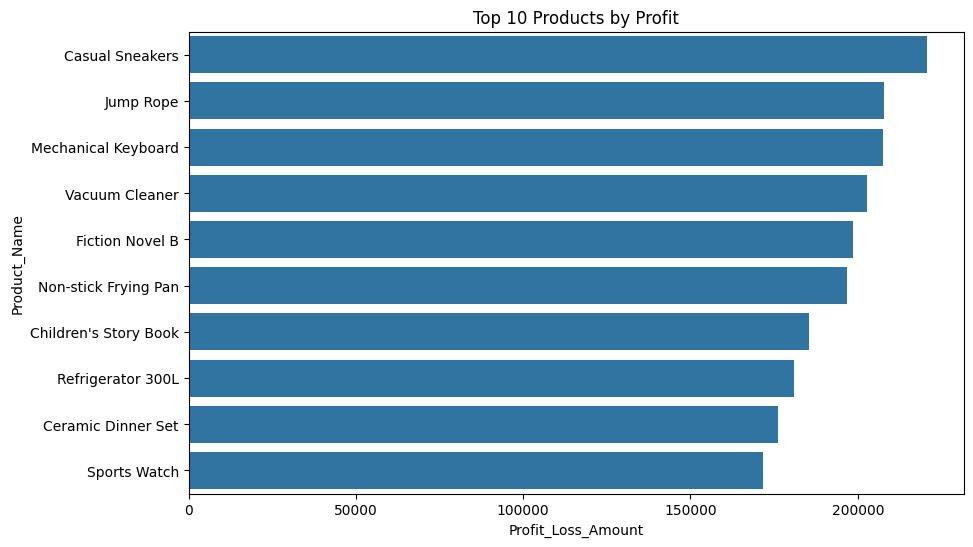

In [27]:
# Top 10 by revenue
top_revenue = sales.groupby("Product_Name")["Revenue"].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Revenue", y="Product_Name", data=top_revenue)
plt.title("Top 10 Products by Revenue")
plt.show()

# Top 10 by profit
top_profit = sales.groupby("Product_Name")["Profit_Loss_Amount"].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Profit_Loss_Amount", y="Product_Name", data=top_profit)
plt.title("Top 10 Products by Profit")
plt.show()


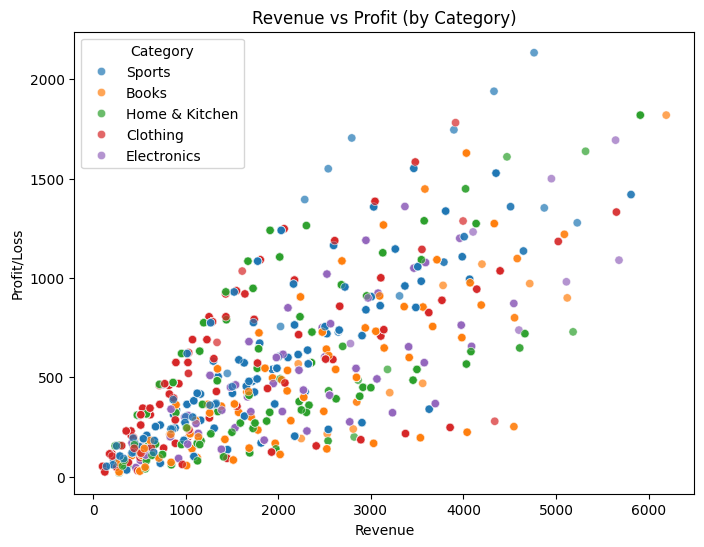

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Revenue", y="Profit_Loss_Amount", hue="Category", data=sales, alpha=0.7)
plt.title("Revenue vs Profit (by Category)")
plt.xlabel("Revenue")
plt.ylabel("Profit/Loss")
plt.show()


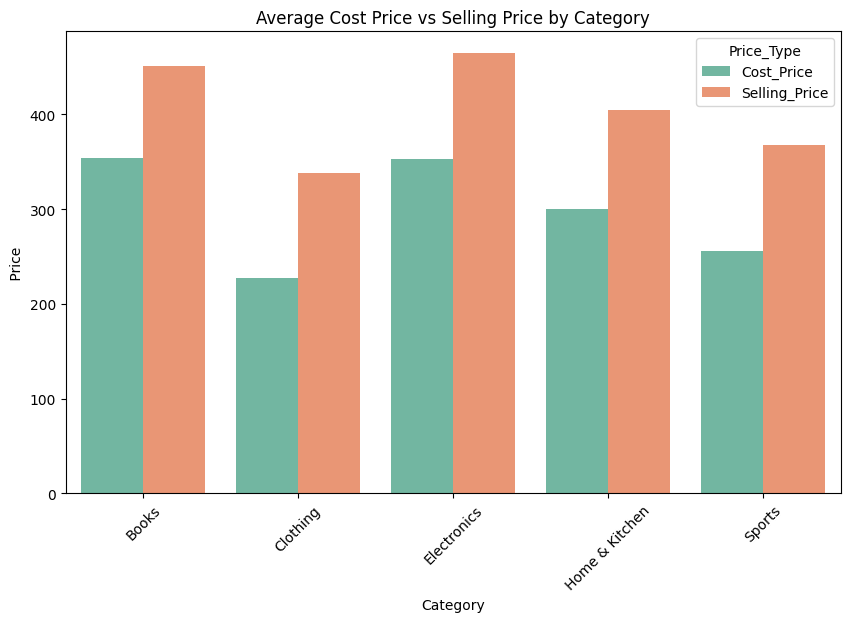

In [28]:

# Group by category to get average cost & selling price
category_prices = sales.groupby("Category")[["Cost_Price", "Selling_Price"]].mean().reset_index()

# Melt the dataframe to long format for seaborn
category_prices_melted = category_prices.melt(id_vars="Category", value_vars=["Cost_Price", "Selling_Price"],
                                              var_name="Price_Type", value_name="Price")

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Category", y="Price", hue="Price_Type", data=category_prices_melted, palette="Set2")
plt.title("Average Cost Price vs Selling Price by Category")
plt.xticks(rotation=45)
plt.ylabel(" Price ")
plt.show()


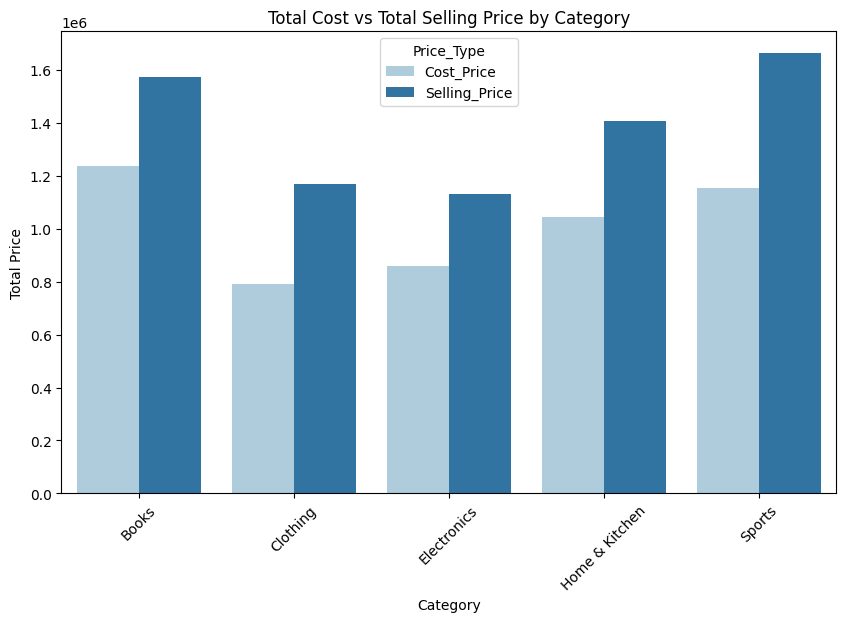

In [48]:
# Group by category to get total cost and selling price
category_totals = sales.groupby("Category")[["Cost_Price", "Selling_Price"]].sum().reset_index()

# Melt for seaborn
category_totals_melted = category_totals.melt(id_vars="Category", value_vars=["Cost_Price", "Selling_Price"],
                                              var_name="Price_Type", value_name="Total_Price")

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Category", y="Total_Price", hue="Price_Type", data=category_totals_melted, palette="Paired")
plt.title("Total Cost vs Total Selling Price by Category")
plt.xticks(rotation=45)
plt.ylabel("Total Price")
plt.show()


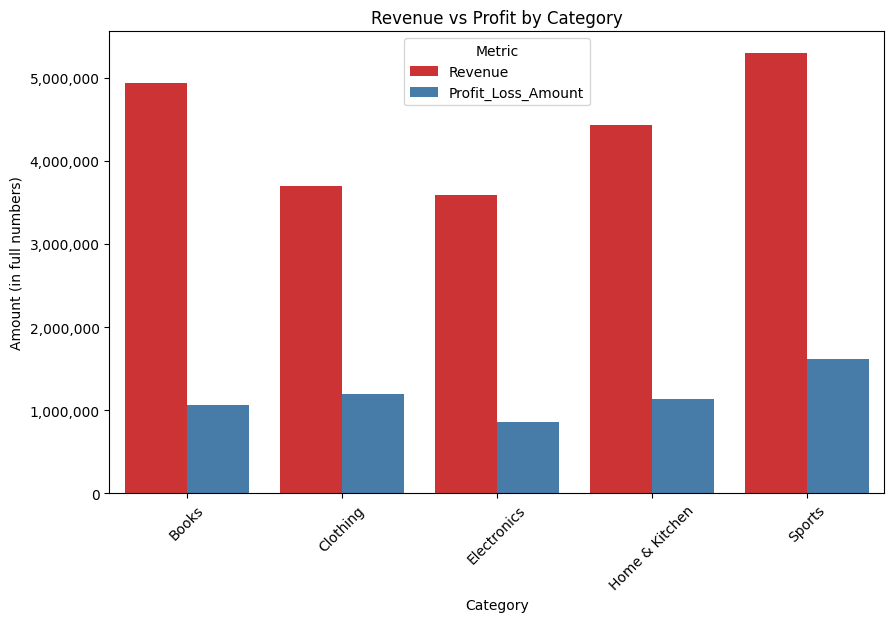

In [29]:
import matplotlib.ticker as mticker

# Group by category for total revenue and profit
category_perf = sales.groupby("Category")[["Revenue", "Profit_Loss_Amount"]].sum().reset_index()

# Melt for seaborn
category_perf_melted = category_perf.melt(
    id_vars="Category", 
    value_vars=["Revenue", "Profit_Loss_Amount"],
    var_name="Metric", 
    value_name="Amount"
)

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Category", y="Amount", hue="Metric", data=category_perf_melted, palette="Set1")

# Format Y-axis to show full numbers (no scientific notation)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Revenue vs Profit by Category")
plt.xticks(rotation=45)
plt.ylabel("Amount (in full numbers)")
plt.show()
